# Multiple Linear Regression with a Single Perceptron and n Input Nodes

## Table of Contents
1. [What is a Multiple Linear Regression using n Input Nodes](#1.0)
2. [Notation](#1.1)
3. [Finding the Parameters](#2.0)
   1. [Loss Function(L) and Cost Function(C)](#2.1)
   2. [Partial Derivatives](#2.2)
   3. [Forward and Back Propagation](#2.3)
4. [Implementation](#3.0)
   1. [Dataset](#3.1)
   2. [Data Preprocessing](#3.2)
   3. [Training the Model](#3.3)
   5. [Predictions](#3.4)
   6. [Comparing results with scikit learn](#3.6)

<a id="1.0"></a>
## What is a Multiple Linear Regression using n Input Nodes

A Linear Regression with n input nodes involves fitting a hyperplane defined by the equation:<br>
$\hat{y} = w_{1}x_{1} + w_{2}x_{2}+...+w_{n}x_{n} + b$ <br>
This hyperplane best captures the relationship between the input variables($x_{1},x_{2},...,x_{n}$)
and the target variable $y$.
For each prediction, the residual error is calculated as the difference between the predicted value 
$\hat{𝑦}$ and the actual observed value $𝑦$.

The hyperplane that minimizes the sum of the squared residuals is chosen, ensuring that no other hyperplane provides a smaller sum.

$$\text{Sum of squared residuals for n predictions} =\sum_{i=1}^{n} \left( \hat{y}_{i} - y_{i} \right)^2$$


<a id="1.1"></a>
## Notation

n = number of features 

m = data size

$W = \begin{bmatrix} 
w_1 & w_2 & ...& w_n
\end{bmatrix}$

$X = \begin{bmatrix} 
x_{1(1)} & x_{1(2)} & ...& x_{1(m)}\\
x_{2(1)} & x_{2(2)} & ...& x_{2(m)}\\
...&...&...&...\\
x_{n(1)} & x_{n(2)} & ...& x_{n(m)}
\end{bmatrix}$

$WX + b = \begin{bmatrix} 
(w_{1}x_{1(1)}+ w_{2}x_{2(1)}+...+ w_{n}x_{n(1)}+b) & (w_{1}x_{1(2)}+ w_{2}x_{2(2)} +...+ w_{n}x_{n(2)}+b)&...&
(w_{1}x_{1(m)}+ w_{2}x_{2(m)} +...+ w_{n}x_{n(m)}+b)
\end{bmatrix}$

$\hat{Y} = WX + B$


$\hat{Y} = \begin{bmatrix}
\hat{y_{1}} & \hat{y_{2}}&...& \hat{y_{m}}\\
\end{bmatrix}$

$ J =
\begin{bmatrix}
1 \\
1 \\
... \\
1
\end{bmatrix}
$

$
J dimension:(m x 1)
$

<a id="2.0"></a>
## Finding the Parameters 

For this case, we need to determine the parameters $W$ and $b$. First we must define an equation (the loss function) that measures the error for individual predictions. To optimize the model, we use a cost function, which is the average of the loss function over all training examples. With the cost function defined, in terms of the parameters $W$ and $b$, we can apply gradient descent to find the values that minimize it. This involves calculating the partial derivatives of the cost function with respect to $W$ and $b$ and iteratively updating the parameters in the direction that reduces the error.

<a id="2.1"></a>
### Loss Function(L) and Cost Function(C)

$$\hat{y} = w_{1}x_{1} + w_{2}x_{2}+...+w_{n}x_{n} + b$$
$$\text{L} =\sum_{i=1}^{m} \left( \hat{y}_{i} - y_{i} \right)^2$$
$$\text{C} =\frac{\sum_{i=1}^{m} \left( \hat{y}_{i} - y_{i} \right)^2}{m}\frac{1}{2}$$
 

For this case of cost function, we will divide by two merely for convenience, as taking the partial derivative will result in a simpler expression

<a id="2.2"></a>
### Partial Derivatives

\begin{align}
\frac{\partial \mathcal{C} }{ \partial w_{1} } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}_{i} - y_{i}\right)x_{1i},\\
\frac{\partial \mathcal{C} }{ \partial w_{2} } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}_{i} - y_{i}\right)x_{2i},\\
...\\
\frac{\partial \mathcal{C} }{ \partial w_{n} } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}_{i} - y_{i}\right)x_{ni},\\
\frac{\partial \mathcal{C} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}_{i} - y_{i}\right).
\end{align}

we can put the partial derivativas in a matrix, also theres is an easy way of creating this matrix.

$$
\begin{align}
\frac{\partial \mathcal{C} }{ \partial W } &= 
\begin{bmatrix} 
\displaystyle \frac{\partial \mathcal{C} }{ \partial w_{1}} & 
\displaystyle \frac{\partial \mathcal{C} }{ \partial w_{2}} & 
\cdots & 
\displaystyle \frac{\partial \mathcal{C} }{ \partial w_{n}} 
\end{bmatrix} \\
\\
\frac{\partial \mathcal{C} }{ \partial W } &= \frac{1}{m} (\hat{Y}-Y)X^{T}\\
\\
\frac{\partial \mathcal{C} }{ \partial b } &= \frac{1}{m} (\hat{Y}-Y)J
\end{align}
$$


<a id="2.3"></a>
### Forward and Back Propagation

The goal at the end of the algorithm is to determine the optimal 
W and b

Forward Propagation:
We must first guess any valuee for W, and b. 
typically b is initialized to 0. 
Using these parameters, we can calculate our initial cost.

Backward Propagation:
We now determine the corrections for the parameters based on gradient descent:

\begin{align}
\alpha    &= \text{learning rate}, \\
W    &= W - \alpha \frac{\partial \mathcal{C}}{ \partial W}, \\
b&= b - \alpha \frac{\partial \mathcal{C}}{ \partial b}.
\end{align}

Now, using the new W and b, we perform the process again for a predetermined number of cycles. The calculated cost should decrease until it converges. Once convergence is achieved, we will have the optimal W and b.

<a id="3.0"></a>
## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(3)

<a id="3.1"></a>
### Dataset
We will use some columns to predict the SalePrice.

In [2]:
path = "data/house_prices_train.csv"
df = pd.read_csv(path)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
X_multi = df[['GrLivArea', 'OverallQual','LotArea','YearBuilt','BedroomAbvGr','TotRmsAbvGrd','GarageCars']]
Y_multi = df['SalePrice']
display(X_multi)
display(Y_multi)

,GrLivArea,OverallQual,LotArea,YearBuilt,BedroomAbvGr,TotRmsAbvGrd,GarageCars
0,1710,7,8450,2003,3,8,2
1,1262,6,9600,1976,3,6,2
2,1786,7,11250,2001,3,6,2
3,1717,7,9550,1915,3,7,3
4,2198,8,14260,2000,4,9,3
...,...,...,...,...,...,...,...
1455,1647,6,7917,1999,3,7,2
1456,2073,6,13175,1978,3,7,2
1457,2340,7,9042,1941,4,9,1
1458,1078,5,9717,1950,2,5,1


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
X_multi.isnull().sum()

GrLivArea       0
OverallQual     0
LotArea         0
YearBuilt       0
BedroomAbvGr    0
TotRmsAbvGrd    0
GarageCars      0
dtype: int64

In [5]:
Y_multi.isnull().sum()

0

<a id="3.2"></a>
### Data Preprocessing

#### Normalization
We need to normalize the values first to help gradient descent converge more efficiently.

In [6]:
X_multi

,GrLivArea,OverallQual,LotArea,YearBuilt,BedroomAbvGr,TotRmsAbvGrd,GarageCars
0,1710,7,8450,2003,3,8,2
1,1262,6,9600,1976,3,6,2
2,1786,7,11250,2001,3,6,2
3,1717,7,9550,1915,3,7,3
4,2198,8,14260,2000,4,9,3
...,...,...,...,...,...,...,...
1455,1647,6,7917,1999,3,7,2
1456,2073,6,13175,1978,3,7,2
1457,2340,7,9042,1941,4,9,1
1458,1078,5,9717,1950,2,5,1


In [7]:
X_denormalized = np.array(X_multi)
Y_denormalized = np.array(Y_multi)

In [8]:
def normalize(arr,original_arr):
    original_arr = original_arr.astype(float)
    mean = np.mean(original_arr, axis = 0)
    std = np.std(original_arr, axis = 0)

    normalized = (arr - mean)/std

    return normalized

def denormalize(arr, original_arr):
    original_arr = original_arr.astype(float)
    mean = np.mean(original_arr, axis = 0)
    std = np.std(original_arr, axis = 0)

    denormalized = arr*std + mean
    
    return denormalized
    

In [9]:
X_norm = normalize(X_denormalized,X_denormalized)
Y_norm = normalize(Y_denormalized,Y_denormalized)

<a id="3.3"></a>
### Training the model

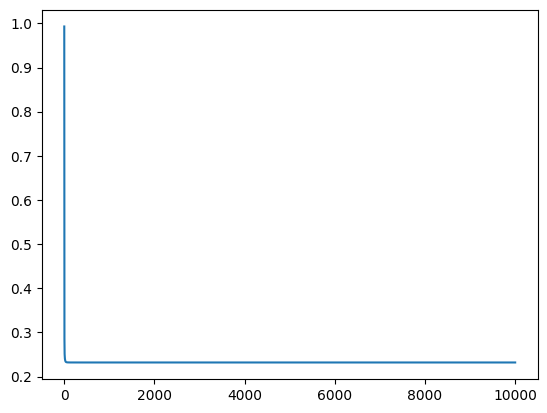

w: [[ 0.38250518  0.38141513  0.1045683   0.1435269  -0.12222252  0.05732627
   0.12894471]]
b: [[1.39431845e-17]]


In [10]:
# initialize W and B
#inputs
X = X_norm.T
Y = Y_norm
lr = 0.12 # Defining the learning rate
diff = 0.000000000000000001 # percentage difference between an error and its subsequent one

# cost log for each iteration
cost_list = []
# counter for each iteration as a list and initial counter_count c
count_list = []
c = 0

m = X.shape[1]

# Random initialization of W and b
W = np.random.randn(1,X.shape[0])*0.01
B = np.zeros((1,1))

#loop
while True:
    #forward propagation
    Y_hat = np.dot(W,X) + B
    cost = (np.sum((Y_hat - Y)**2))/m
    cost_list.append(cost)
    
    # back propagation
    W = W - lr*((1/m)*np.dot((Y_hat - Y),(X.T)))
    B = B - lr*(1/m)*np.sum((Y_hat-Y))

    c = c + 1
    count_list.append(c)
    # display the cost for each iteration
    #print(f'Cost for iteration {c}: {cost}')
    
    # Checking if the difference between the last two costs is acceptable
    '''
    if len(cost_list) >1:
        if ((cost_list[-2] - cost_list[-1])/cost_list[-2]) < diff:
            break
        elif c==10000:
            break
    '''
    if c == 10000:
        break



# plot the cost for each iteraction
plt.plot(count_list,cost_list)
plt.show()
print(f'w: {W}')
print(f'b: {B}')

<a id="3.4"></a>
### Predictions
Each column represents a feature, and each row represents a set to be used for prediction.

In [11]:
X_pred = X_denormalized[0:5]
Y_pred = Y_denormalized[0:5]
print('')
display(X_pred)

array([[ 1710,     7,  8450,  2003,     3,     8,     2],
       [ 1262,     6,  9600,  1976,     3,     6,     2],
       [ 1786,     7, 11250,  2001,     3,     6,     2],
       [ 1717,     7,  9550,  1915,     3,     7,     3],
       [ 2198,     8, 14260,  2000,     4,     9,     3]], dtype=int64)

In [12]:
# normalize to put in the model
X_pred_norm = normalize(X_pred,X_denormalized)
# put the normalized values in the model
Y_pred_hat =np.dot(W,X_pred_norm.T) + B[0][0]
# denormalize the predictions
Y_pred_hat = denormalize(Y_pred_hat,Y_denormalized)

print(f'values predicted: {[round(valor, 3) for valor in Y_pred_hat[0]]}')

values predicted: [227918.789, 165263.14, 228285.267, 206922.965, 286357.759]


<a id="3.6"></a>
### Comparing results with scikit learn

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_denormalized,Y_denormalized)

LinearRegression()

In [14]:
y_pred_2 = model.predict(X_pred)
print(f' Predicted values model created:{[round(valor, 3) for valor in Y_pred_hat[0]]}')
print(f' Predicted values Scikit Learn: {[round(valor, 3) for valor in y_pred_2]}')

 Predicted values model created:[227918.789, 165263.14, 228285.267, 206922.965, 286357.759]
 Predicted values Scikit Learn: [227918.789, 165263.14, 228285.267, 206922.965, 286357.759]
